In [17]:
import requests
import pandas as pd 

In [18]:
url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address"
params = {
    "postalcode": "82009",
    "page": "1",
    "pagesize": "500"
    }
headers = {
    "accept": "application/json",
    "apikey": "452c399225da2badceca7aca64cc55b0"
}
try:
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        properties = data.get("property", [])
        if not isinstance(properties, list):
            properties = [properties]
        df = pd.json_normalize(
            properties,
            sep='_'
        )
        print(df.head())
    else:
        print(f"Request failed with status code {response.status_code}")
        print(response.text)
except Exception as e:
    print(f"An error occurred: {e}")

   identifier_Id identifier_fips  identifier_apn  identifier_attomId  \
0         180053           56021  16885000400010              180053   
1         228520           56021  18015000247070              228520   
2         239936           56021  11054000400170              239936   
3         240202           56021  11054000900012              240202   
4         263622           56021  13923000600141              263622   

  address_country address_countrySubd     address_line1       address_line2  \
0              US                  WY     4009 CARLA DR  CHEYENNE, WY 82009   
1              US                  WY   4707 HICKORY PL  CHEYENNE, WY 82009   
2              US                  WY    252 E IDAHO ST  CHEYENNE, WY 82009   
3              US                  WY  9420 MICHIGAN ST  CHEYENNE, WY 82009   
4              US                  WY    4717 MORAN AVE  CHEYENNE, WY 82009   

  address_locality address_matchCode  ...  \
0         CHEYENNE            ExaStr  ...   
1 

In [19]:
df

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoid,location_geoIdV4_CO,location_geoIdV4_CS,location_geoIdV4_DB,location_geoIdV4_N4,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate
0,180053,56021,16885000400010,180053,US,WY,4009 CARLA DR,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,22b24a91277613b572bb847840bad23d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, a12b93bb835a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
1,228520,56021,18015000247070,228520,US,WY,4707 HICKORY PL,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,ac4725a7497f492cc0bda6e12e09ed2d,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
2,239936,56021,11054000400170,239936,US,WY,252 E IDAHO ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, RS00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
3,240202,56021,11054000900012,240202,US,WY,9420 MICHIGAN ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690770, DB5601980, PL5663800, SB00...",16856031afb1b236f0d628bb802eac71,e5a490a174895893b11ce251b6cea7bd,30c86a3f2f5c848363c435461b716572,NaN,d3249a2aecfeabe2a060e532ab7d2ad4,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
4,263622,56021,13923000600141,263622,US,WY,4717 MORAN AVE,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,5c0988930d223ac4d02a8c930641c123,802b98230660b6ebebd36a06ec9e541e,"2adc253f6a9750a26911d38c6cd21b9b, 9ef520046d8a...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8828243,56021,18265000100160,8828243,US,WY,400 E CARLSON ST,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,079e8e8fabf45c64bfbf5db0d878a7eb,802b98230660b6ebebd36a06ec9e541e,"744f36341a01a573d4ff7c61ea2cc7ed, 48585caa18b3...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
496,8828258,56021,12364000200050,8828258,US,WY,4801 MOUNTAIN RD,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, SB00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"26c640f6b7160b5a8774e22abe70c51b, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
497,8828259,56021,12364000200010,8828259,US,WY,4800 KING ARTHUR WAY,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8fb7766fb633eb98b90048e74f,30c86a3f2f5c848363c435461b716572,e43b630f809ae2cd918a8ed63d15966d,802b98230660b6ebebd36a06ec9e541e,"26c640f6b7160b5a8774e22abe70c51b, 2adc253f6a97...",ac6c213665a7701bd3617ada1ff96513,2025-07-22,2025-07-22
498,8828260,56021,12364000100010,8828260,US,WY,4801 KING ARTHUR WAY,"CHEYENNE, WY 82009",CHEYENNE,ExaStr,...,"CO56021, CS5690715, DB5601980, PL5613900, RS00...",16856031afb1b236f0d628bb802eac71,29392c8f

In [20]:
df = df[['address_line1', 'address_line2']]
df

,address_line1,address_line2
0,4009 CARLA DR,"CHEYENNE, WY 82009"
1,4707 HICKORY PL,"CHEYENNE, WY 82009"
2,252 E IDAHO ST,"CHEYENNE, WY 82009"
3,9420 MICHIGAN ST,"CHEYENNE, WY 82009"
4,4717 MORAN AVE,"CHEYENNE, WY 82009"
...,...,...
495,400 E CARLSON ST,"CHEYENNE, WY 82009"
496,4801 MOUNTAIN RD,"CHEYENNE, WY 82009"
497,4800 KING ARTHUR WAY,"CHEYENNE, WY 82009"
498,4801 KING ARTHUR WAY,"CHEYENNE, WY 82009"


In [21]:
df['address_line2'] = df['address_line2'].str.replace(r'\s*\d{5}$', '', regex=True)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_3408\153973787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address_line2'] = df['address_line2'].str.replace(r'\s*\d{5}$', '', regex=True)


,address_line1,address_line2
0,4009 CARLA DR,"CHEYENNE, WY"
1,4707 HICKORY PL,"CHEYENNE, WY"
2,252 E IDAHO ST,"CHEYENNE, WY"
3,9420 MICHIGAN ST,"CHEYENNE, WY"
4,4717 MORAN AVE,"CHEYENNE, WY"
...,...,...
495,400 E CARLSON ST,"CHEYENNE, WY"
496,4801 MOUNTAIN RD,"CHEYENNE, WY"
497,4800 KING ARTHUR WAY,"CHEYENNE, WY"
498,4801 KING ARTHUR WAY,"CHEYENNE, WY"


In [ ]:
import requests
import pandas as pd
results = []
for idx, row in df.iterrows():
    params = {
        "address1": row['address_line1'],
        "address2": row['address_line2']
    }
    headers = {
        "accept": "application/json",
        "apikey": "452c399225da2badceca7aca64cc55b0"
    }
    try:
        response = requests.get(
            "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/detail",
            headers=headers,
            params=params
        )
        if response.status_code == 200:
            data = response.json()
            properties = data.get("property", [])
            if not isinstance(properties, list):
                properties = [properties]
            for prop in properties:
                results.append(prop)
        else:
            print(f"Failed for {params}: {response.status_code}")
    except Exception as e:
        print(f"Error for {params}: {e}")

property_df = pd.json_normalize(results, sep='_')


Failed for {'address1': '1111 ROAD 135', 'address2': 'CHEYENNE, WY'}: 400
Failed for {'address1': '611 STERLING DR', 'address2': 'CHEYENNE, WY'}: 400
Failed for {'address1': '2125 BRIARWOOD LN', 'address2': 'CHEYENNE, WY'}: 400
Failed for {'address1': '200 DELL RANGE BLVD', 'address2': 'CHEYENNE, WY'}: 400
Failed for {'address1': '3563 CITATION RD', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '1243 AFFIRMED RD', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '1229 AFFIRMED RD', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '10795 ORCHARD DR', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '850 STERLING DR', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '818 STERLING DR', 'address2': 'CHEYENNE, WY'}: 401
Failed for {'address1': '2430 PETERSEN DR', 'address2': 'CHEYENNE, WY'}: 401


KeyboardInterrupt: 

In [25]:
property_df

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_loctype,...,building_summary_unitsCount,sale_amount_saleamt,sale_calculation_pricepersizeunit,lot_poolind,area_srvyRange,area_srvySection,area_srvyTownship,sale_foreclosure,area_subdtractnum,utilities_heatingfuel
0,180053,56021,16885000400010,180053,1,0.172153,7499,NO POOL,4,VIEW - NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228520,56021,18015000247070,228520,NaN,1.110000,48510,NO POOL,NaN,VIEW - NONE,...,8,131906.0,16.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,239936,56021,11054000400170,239936,"17,18",0.826446,36000,NO POOL,4,VIEW - NONE,...,NaN,253521.0,185.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240202,56021,11054000900012,240202,1,4.660000,202990,NaN,9,VIEW - NONE,...,NaN,335985.0,183.60,YES,NaN,NaN,NaN,NaN,NaN,NaN
4,263622,56021,13923000600141,263622,"14,15",0.223829,9750,NO POOL,6,VIEW - NONE,...,NaN,357688.0,372.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2258333,56021,12378000600010,2258333,1,4.280000,186437,NO POOL,6,VIEW - NONE,...,NaN,525000.0,328.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2258334,56021,12378000800050,2258334,5,6.000000,261360,NaN,8,VIEW - NONE,...,NaN,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN
97,2258335,56021,12378000400060,2258335,6,4.280000,186437,NaN,4,VIEW - NONE,...,NaN,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN
98,2258336,56021,12378000400020,2258336,2,4.570000,199069,NO POOL,4,VIEW - NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
property_df.to_csv("data_down.csv")

In [27]:
columns_to_drop = [
    "identifier_fips", "identifier_apn", "identifier_attomId",
    "area_loctype", "area_countrysecsubd", "area_countyuse1", "area_muncode",
    "area_munname", "address_country", "address_countrySubd", "address_line2",
    "address_matchCode", "address_oneLine", "address_postal1",
    "location_latitude", "location_longitude", "location_distance",
    "location_geoid", "location_geoIdV4_CS", "location_geoIdV4_DB",
    "location_geoIdV4_N4", "location_geoIdV4_PL", "location_geoIdV4_SB",
    "location_geoIdV4_ZI", "summary_absenteeInd", "summary_propclass",
    "summary_propsubtype", "summary_propLandUse", "summary_legal1",
    "building_interior_fplccount", "building_construction_condition",
    "building_construction_frameType", "building_summary_bldgsNum",
    "building_summary_view", "vintage_lastModified", "vintage_pubDate",
    "sale_salesearchdate", "sale_saleTransDate", "sale_amount_salerecdate",
    "sale_amount_saledisclosuretype", "sale_amount_saledoctype",
    "sale_amount_saledocnum", "sale_interfamily",
    "sale_resaleornewconstruction", "sale_cashormortgagepurchase",
    "sale_vintage_lastModified", "building_rooms_bathspartial",
    "building_summary_unitsCount", "lot_poolind", "area_srvyRange",
    "area_srvySection", "area_srvyTownship", "sale_foreclosure",
    "area_subdtractnum", "utilities_heatingfuel"
]
property_df = property_df.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [28]:
property_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,1,0.172153,7499,NO POOL,4,PARK ESTATES,0150,4009 CARLA DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
1,228520,NaN,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,0150,4707 HICKORY PL,CHEYENNE,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,000,Resale,131906.0,16.12
2,239936,"17,18",0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
3,240202,1,4.660000,202990,NaN,9,ALL AMERICA SUBDIVISION,0117,9420 MICHIGAN ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,335985.0,183.60
4,263622,"14,15",0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2258333,1,4.280000,186437,NO POOL,6,CHERRY HILLS OF CHEYENNE,0117,10797 CHERRY WOOD LN,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,525000.0,328.13
96,2258334,5,6.000000,261360,NaN,8,CHERRY HILLS OF CHEYENNE,0117,10389 CHOKE CHERRY RD,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
97,2258335,6,4.280000,186437,NaN,4,CHERRY HILLS OF CHEYENNE,0117,4284 CHERRY WINE DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
98,2258336,2,4.570000,199069,NO POOL,4,CHERRY HILLS OF CHEYENNE,0117,10667 ORCHARD DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Nominal/Quit Claim,NaN,NaN


In [30]:
from io import StringIO
url = "http://127.0.0.1:8000/generate-property-data"
response = requests.get(url)
if response.status_code == 200:
    dummy_df = pd.read_csv(StringIO(response.text))
else:
    print(f"Request failed with status code {response.status_code}")

In [31]:
dummy_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,1,1,0.10,4000,NO POOL,0,Subdivision 0,TX0,1000 Main St,City0,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,100000,100
1,2,2,0.15,4100,POOL,1,Subdivision 1,TX1,1001 Main St,City1,...,Colonial,House,TypeA,2,Average,Two Story,NONE,Full,101000,101
2,3,3,0.20,4200,NO POOL,2,Subdivision 2,TX2,1002 Main St,City2,...,Ranch,House,TypeA,3,Average,One Story,NONE,Full,102000,102
3,4,4,0.25,4300,POOL,3,Subdivision 3,TX0,1003 Main St,City3,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,103000,103
4,5,5,0.30,4400,NO POOL,4,Subdivision 4,TX1,1004 Main St,City4,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,104000,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,16,0.35,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000,115
496,497,17,0.40,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000,116
497,498,18,0.45,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000,117
498,499,19,0.50,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000,118


In [34]:
m_df = pd.concat([property_df, dummy_df], ignore_index=True)

In [35]:
m_df.drop("utilities_coolingtype" ,axis =1)

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,1,0.172153,7499,NO POOL,4,PARK ESTATES,0150,4009 CARLA DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
1,228520,NaN,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,0150,4707 HICKORY PL,CHEYENNE,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,000,Resale,131906.0,16.12
2,239936,"17,18",0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
3,240202,1,4.660000,202990,NaN,9,ALL AMERICA SUBDIVISION,0117,9420 MICHIGAN ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,335985.0,183.60
4,263622,"14,15",0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,16,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,17,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,18,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,19,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [37]:
columns_to_drop = [
    "utilities_coolingtype",
    "lot_lotnum"
]
m_df = m_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
m_df

,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,0.172153,7499,NO POOL,4,PARK ESTATES,0150,4009 CARLA DR,CHEYENNE,5548,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,NaN,NaN
1,228520,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,0150,4707 HICKORY PL,CHEYENNE,5122,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,000,Resale,131906.0,16.12
2,239936,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
3,240202,4.660000,202990,NaN,9,ALL AMERICA SUBDIVISION,0117,9420 MICHIGAN ST,CHEYENNE,9613,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,335985.0,183.60
4,263622,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [38]:
m_df.dropna(inplace=True)
m_df.drop_duplicates()

,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,239936,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
4,263622,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
5,268220,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,0150,4701 ONTARIO AVE,CHEYENNE,5633,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,276760.0,303.46
8,278288,0.211777,9225,NO POOL,14,INDIAN HILLS,0150,729 APACHE ST,CHEYENNE,4220,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,000,Resale,264528.0,229.63
13,336047,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,0150,132 DELL RANGE BLVD,CHEYENNE,4706,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [39]:
m_df

,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,239936,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
4,263622,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
5,268220,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,0150,4701 ONTARIO AVE,CHEYENNE,5633,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,276760.0,303.46
8,278288,0.211777,9225,NO POOL,14,INDIAN HILLS,0150,729 APACHE ST,CHEYENNE,4220,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,000,Resale,264528.0,229.63
13,336047,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,0150,132 DELL RANGE BLVD,CHEYENNE,4706,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,496,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,497,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,498,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,499,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [40]:
m_df[m_df.astype(str).apply(lambda x: x.str.contains('\?')).any(axis=1)]

<>:1: SyntaxWarning: invalid escape sequence '\?'
<>:1: SyntaxWarning: invalid escape sequence '\?'
C:\Users\admin\AppData\Local\Temp\ipykernel_3408\4090365726.py:1: SyntaxWarning: invalid escape sequence '\?'
  m_df[m_df.astype(str).apply(lambda x: x.str.contains('\?')).any(axis=1)]


,identifier_Id,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit


In [41]:
columns_to_drop = [
    "identifier_Id"
]
m_df = m_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
m_df

,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,0117,252 E IDAHO ST,CHEYENNE,8902,H056,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,000,Resale,253521.0,185.59
4,0.223829,9750,NO POOL,6,FRONTIER GARDENS,0150,4717 MORAN AVE,CHEYENNE,5218,C036,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,357688.0,372.59
5,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,0150,4701 ONTARIO AVE,CHEYENNE,5633,C041,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,276760.0,303.46
8,0.211777,9225,NO POOL,14,INDIAN HILLS,0150,729 APACHE ST,CHEYENNE,4220,C045,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,000,Resale,264528.0,229.63
13,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,0150,132 DELL RANGE BLVD,CHEYENNE,4706,C043,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,000,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.350000,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,ZIP2-95,ZIP3-45,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
596,0.400000,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,ZIP2-96,ZIP3-46,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
597,0.450000,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,ZIP2-97,ZIP3-47,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
598,0.500000,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,ZIP2-98,ZIP3-48,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


In [42]:
m_df[m_df.astype(str).apply(lambda x: x.str.contains('\#')).any(axis=1)]

<>:1: SyntaxWarning: invalid escape sequence '\#'
<>:1: SyntaxWarning: invalid escape sequence '\#'
C:\Users\admin\AppData\Local\Temp\ipykernel_3408\4198524555.py:1: SyntaxWarning: invalid escape sequence '\#'
  m_df[m_df.astype(str).apply(lambda x: x.str.contains('\#')).any(axis=1)]


,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit


In [43]:
m_df[m_df.astype(str).apply(lambda x: x.str.contains('\&')).any(axis=1)]

<>:1: SyntaxWarning: invalid escape sequence '\&'
<>:1: SyntaxWarning: invalid escape sequence '\&'
C:\Users\admin\AppData\Local\Temp\ipykernel_3408\1748713632.py:1: SyntaxWarning: invalid escape sequence '\&'
  m_df[m_df.astype(str).apply(lambda x: x.str.contains('\&')).any(axis=1)]


,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit


In [44]:
m_df.to_csv("data_uncleaned.csv")

In [45]:
m_df['area_blockNum'] = m_df['area_blockNum'].astype(int)
m_df['area_taxcodearea'] = pd.to_numeric(
    m_df['area_taxcodearea'].replace('TX', 0), errors='coerce'
).fillna(0).astype(int)
m_df['building_parking_prkgSpaces'] = m_df['building_parking_prkgSpaces'].astype(int)
m_df.info()
columns_to_drop = ['building_summary_viewCode']
merged_df = m_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
merged_df

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 2 to 599
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lot_lotsize1                            517 non-null    float64
 1   lot_lotsize2                            517 non-null    int64  
 2   lot_pooltype                            517 non-null    object 
 3   area_blockNum                           517 non-null    int64  
 4   area_subdname                           517 non-null    object 
 5   area_taxcodearea                        517 non-null    int64  
 6   address_line1                           517 non-null    object 
 7   address_locality                        517 non-null    object 
 8   address_postal2                         517 non-null    object 
 9   address_postal3                         517 non-null    object 
 10  location_accuracy                       517 non-null    object 
 11

,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_parking_prkgType,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,117,252 E IDAHO ST,CHEYENNE,8902,H056,...,"Garage, Detached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,Resale,253521.0,185.59
4,0.223829,9750,NO POOL,6,FRONTIER GARDENS,150,4717 MORAN AVE,CHEYENNE,5218,C036,...,Mixed,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,357688.0,372.59
5,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,150,4701 ONTARIO AVE,CHEYENNE,5633,C041,...,"Garage, Attached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,276760.0,303.46
8,0.211777,9225,NO POOL,14,INDIAN HILLS,150,729 APACHE ST,CHEYENNE,4220,C045,...,"Garage, Detached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,Resale,264528.0,229.63
13,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,150,132 DELL RANGE BLVD,CHEYENNE,4706,C043,...,"Garage, Attached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.350000,8500,POOL,5,Subdivision 0,0,1495 Main St,City5,ZIP2-95,ZIP3-45,...,Garage,Colonial,House,TypeA,1,Average,Two Story,Full,595000.0,115.00
596,0.400000,8600,NO POOL,6,Subdivision 1,0,1496 Main St,City6,ZIP2-96,ZIP3-46,...,Garage,Ranch,House,TypeA,2,Average,One Story,Full,596000.0,116.00
597,0.450000,8700,POOL,7,Subdivision 2,0,1497 Main St,City7,ZIP2-97,ZIP3-47,...,Garage,Colonial,House,TypeA,3,Average,Two Story,Full,597000.0,117.00
598,0.500000,8800,NO POOL,8,Subdivision 3,0,1498 Main St,City8,ZIP2-98,ZIP3-48,...,Garage,Ranch,House,TypeA,1,Average,One Story,Full,598000.0,118.00


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [
    'lot_pooltype', 'area_subdname',
    'address_line1', 'address_locality','address_postal2','address_postal3','location_accuracy',
    'location_geoIdV4_CO','summary_proptype','summary_propertyType','summary_propIndicator','utilities_heatingtype',
    'building_size_sizeInd','building_interior_bsmttype','building_interior_fplcind','building_interior_fplctype',
    'building_construction_constructiontype','building_construction_roofcover','building_construction_roofShape',
    'building_construction_wallType','building_parking_garagetype','building_parking_prkgType','building_summary_archStyle',
    'building_summary_bldgType','building_summary_imprType','building_summary_quality','building_summary_storyDesc','building_summary_viewCode',
    'sale_amount_saletranstype'
]
for column in columns_to_encode:
    if column in m_df.columns:
        m_df[column] = label_encoder.fit_transform(m_df[column])

In [47]:
m_df

,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,address_postal2,address_postal3,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,0.826446,36000,0,4,0,117,504,0,13,6,...,2,0,0,1,0,0,0,1,253521.0,185.59
4,0.223829,9750,0,6,4,150,506,0,11,1,...,2,0,0,1,2,0,0,1,357688.0,372.59
5,0.137741,6000,0,17,6,150,505,0,12,2,...,2,0,0,1,2,0,0,1,276760.0,303.46
8,0.211777,9225,0,14,5,150,516,0,2,4,...,2,0,0,1,3,0,0,1,264528.0,229.63
13,0.209091,9108,0,3,14,150,321,0,3,3,...,2,0,0,1,2,0,0,1,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.350000,8500,1,5,8,0,498,6,109,47,...,1,1,2,1,1,3,1,0,595000.0,115.00
596,0.400000,8600,0,6,9,0,499,7,110,48,...,3,1,2,2,1,2,1,0,596000.0,116.00
597,0.450000,8700,1,7,10,0,500,8,111,49,...,1,1,2,3,1,3,1,0,597000.0,117.00
598,0.500000,8800,0,8,11,0,501,9,112,50,...,3,1,2,1,1,2,1,0,598000.0,118.00


In [48]:
m_df.to_csv("data_changed.csv")

In [49]:
from sklearn.model_selection import train_test_split
X = m_df.drop(columns=['sale_amount_saleamt','sale_calculation_pricepersizeunit'])
y = m_df['sale_amount_saleamt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 3539.13
Mean Squared Error (MSE): 242526127.74
Root Mean Squared Error (RMSE): 15573.25
R-squared (R2): 0.99


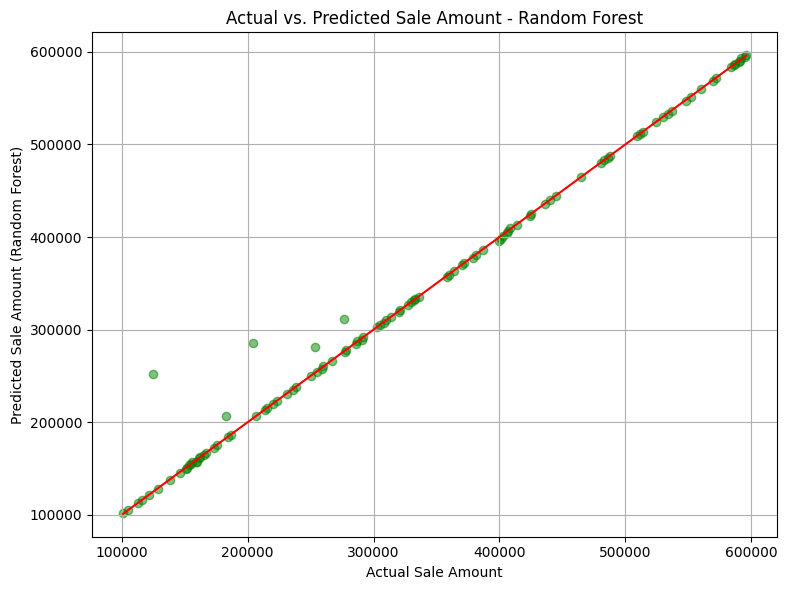

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Random Forest)")
plt.title("Actual vs. Predicted Sale Amount - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")
print(f"Decision Tree Regressor R² Score: {r2_dt:.2f}")


Decision Tree Regressor MSE: 482638826.02
Decision Tree Regressor R² Score: 0.98


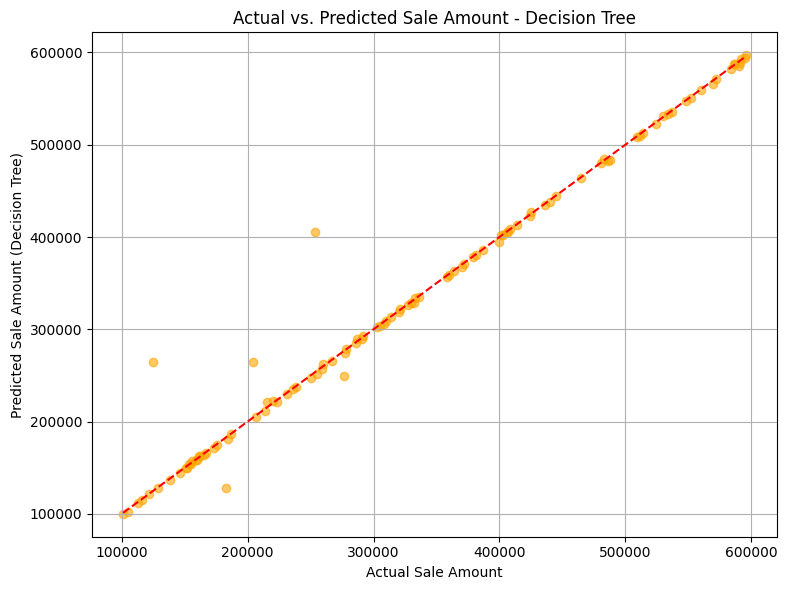

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Decision Tree)")
plt.title("Actual vs. Predicted Sale Amount - Decision Tree")
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)


mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor MSE: {mse_gb:.2f}")
print(f"Gradient Boosting Regressor R² Score: {r2_gb:.2f}")


Gradient Boosting Regressor MSE: 644743829.86
Gradient Boosting Regressor R² Score: 0.97


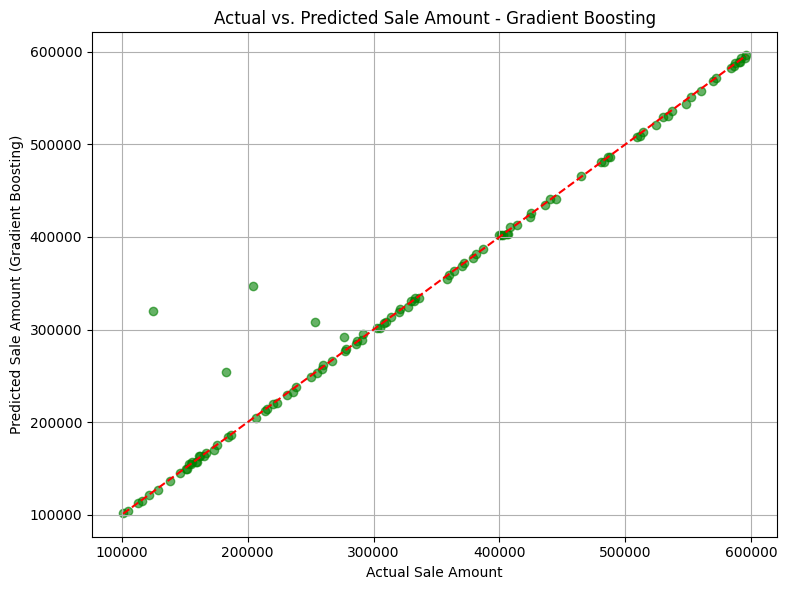

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Gradient Boosting)")
plt.title("Actual vs. Predicted Sale Amount - Gradient Boosting")
plt.grid(True)
plt.tight_layout()
plt.show()
